<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/4%EC%9E%A5%20%EC%98%A4%EC%B0%A8%20%EC%88%98%EC%A0%95%20%3A%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95%2C%20%20%EB%8B%A4%EC%A4%91%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 04 장 오차 수정 : 경사 하강법 / 다중 선형 회귀 ( 3d 그래프 그리기 )


## 경사 하강법 Gradient descent

아래의 그래프는 기울기-오차 간의 관계이다.</br>오차가 가장 작은 부분은 그래프의 가장 아래쪽의 볼록한 부분이 된다. 이 때 꼭짓점의 기울기는 x축과 평행한 선이 된다.</br>다시 말해 기울기가 0이 된다. 따라서 이와 같은 '미분 값이 0인 지점'을 찾아야하는 것이다.

- (1) : 처음 위치에서 미분 값을 구한다.
- (2) : 구해진 기울기의 ***반대 방향***으로 얼마간 이동시킨 위치에서 다시 미분 값을 구한다.
- (3) : 위에서 구한 미분 값이 0이 아니면 (2)의 과정을 다시 반복한다.

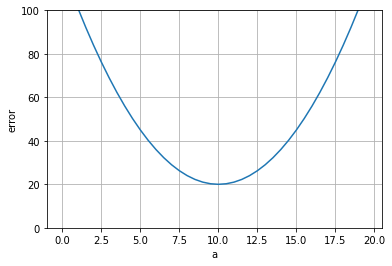

In [1]:
# 경사 하강법

import numpy as np
import matplotlib.pyplot as plt

# 기울기 - 오차 간의 관계 그래프
data_x = np.arange(0, 20, .5)
data_y = (data_x - 10)**2 + 20

plt.plot(data_x, data_y)
plt.grid()
plt.xlabel('a')
plt.ylabel('error')
plt.ylim(0, 100)
plt.show()

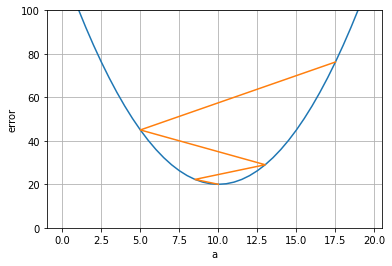

In [ ]:
# rough example of Gradient descent
# this graph does not consider the 'REAL GRADIENT'
# just showing the ideal method
ex_x = np.array([7.5, -5, 3, -1.5, 0])
ex_y = ex_x**2 + 20
ex_x = ex_x + 10

plt.plot(data_x, data_y)
plt.plot(ex_x, ex_y)
plt.grid()
plt.xlabel('a')
plt.ylabel('error')
plt.ylim(0, 100)
plt.show()

## 평균제곱오차 MSE 편미분 계산

$MSE = \frac{1}{n}\sum\limits_{i}^n (\hat{y}_{i}-y_{i})^{2} = \frac{1}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b))^{2}$, $(\hat{y}_{i} = 실제 값, y_{i} = 예측 값)$

$\frac{\partial}{\partial a}MSE(a, b) = -\frac{2}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b))x_{i} = -\frac{2}{n}\sum\limits_{i}^n error_{i}x_{i}$

$\frac{\partial}{\partial b}MSE(a, b) = -\frac{2}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b)) = -\frac{2}{n}\sum\limits_{i}^n error_{i}$


위의 편미분 결과 값에 '학습률 learning rate'을 곱하여 기존의 기울기 $a$와 절편 $b$를 업데이트 하는 것이 앞서 설명한 경사 하강법의 (2)번째 과정이다.

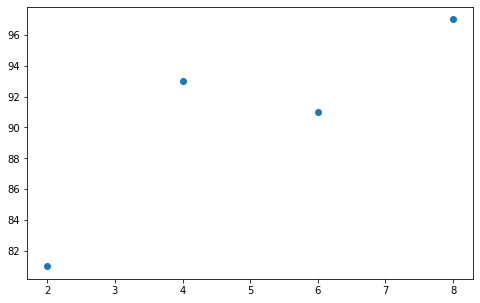

epoch=0, 기울기=23.2000, 절편=4.5250, (a_diff=-928.00000, b_diff=-181.00000)
epoch=100, 기울기=7.9316, 절편=45.3932, (a_diff=1.84111, b_diff=-10.98697)
epoch=200, 기울기=4.7953, 절편=64.1094, (a_diff=0.81577, b_diff=-4.86815)
epoch=300, 기울기=3.4056, 절편=72.4022, (a_diff=0.36145, b_diff=-2.15700)
epoch=400, 기울기=2.7899, 절편=76.0766, (a_diff=0.16015, b_diff=-0.95573)
epoch=500, 기울기=2.5171, 절편=77.7047, (a_diff=0.07096, b_diff=-0.42347)
epoch=600, 기울기=2.3962, 절편=78.4261, (a_diff=0.03144, b_diff=-0.18763)
epoch=700, 기울기=2.3426, 절편=78.7457, (a_diff=0.01393, b_diff=-0.08314)
epoch=800, 기울기=2.3189, 절편=78.8873, (a_diff=0.00617, b_diff=-0.03684)
epoch=900, 기울기=2.3084, 절편=78.9501, (a_diff=0.00274, b_diff=-0.01632)
epoch=1000, 기울기=2.3037, 절편=78.9779, (a_diff=0.00121, b_diff=-0.00723)
epoch=1100, 기울기=2.3016, 절편=78.9902, (a_diff=0.00054, b_diff=-0.00320)
epoch=1200, 기울기=2.3007, 절편=78.9957, (a_diff=0.00024, b_diff=-0.00142)
epoch=1300, 기울기=2.3003, 절편=78.9981, (a_diff=0.00011, b_diff=-0.00063)
epoch=1400, 기울기=2.3001, 절편

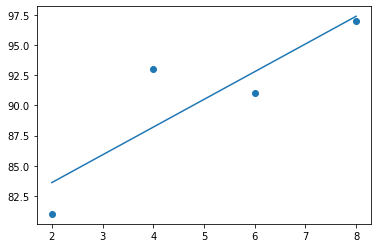

In [2]:
# 전체 코드정리

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 공부 시간 X 와 성적 Y의 리스트 생성
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

# 리스트를 넘파이 배열로 변환
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.025

# 몇 번 반복될 지 설정
epochs = 2001

# 경사 하강법
for i in range(epochs):
  y_pred = a * x_data + b
  error = y_data - y_pred
  
  # 오차 함수를 미분한 값
  a_diff = -(2/len(x_data))*sum(x_data * error)
  b_diff = -(2/len(x_data))*sum(error)

  a = a - lr*a_diff
  b = b - lr*b_diff

  if i%100 == 0:
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f, (a_diff=%.05f, b_diff=%.05f)" % (i, a, b, a_diff, b_diff))
    
#앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기

y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

기울기$a와 b$가 2.3과 79에 수렴하는 과정을 볼 수 있다. 

이와 같은 방식으로 $x$가 여러 개인 다중 선형 회귀모델에서도 사용할 수 있다.

## 다중 선형 회귀

앞서 공부한 시간에 따른 예측 직선을 그리고자 기울기 $a$와 $y 절편 b$를 구했다. 이렇게 구한 직선임에도 여전히 약간의 오차가 있는 것을 볼 수 있다.</br>이는 공부한 시간 외에 다른 요소가 성적에 영향을 끼쳤기 때문이다.

더 정화간 예측을 위해서는 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측 값을 구하려면 변수의 개수를 늘려 **다중 선형 회귀**를 만들어 주어야 한다.

예를 들어, 일주일 동안 받는 과외 수업 회수를 추가로 조사해 보았다고 해본다.

|공부한 시간($x_1$)|과외 수업 회수($x_2$)|성적(실제 값, y)|
|------|---|---|
|2|0|81|
|4|4|93|
|6|2|91|
|8|3|97|

지금부터 두 개의 독립변수 $x_1$ 과 $x_2$가 생긴 것이다.</br>이를 사용해 종속 변수 y를 만들 경우 기울기를 두 개 구해야 하므로 다음과 같은 식이 나온다.

$$y = a_1 x_1 + a_2 x_2 + b$$

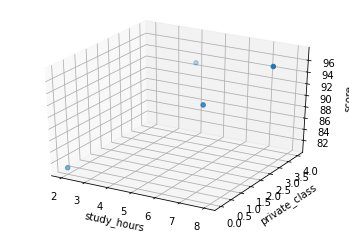

In [3]:
# 다중 선형 회귀 준비
# x, y 두 개의 축이 아닌 / 3개의 축이 필요
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

# 3d로 시각화
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3d 그래프 그리는 라이브러리 가져오기

ax = plt.axes(projection = '3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.scatter(x1, x2, y)
plt.show()

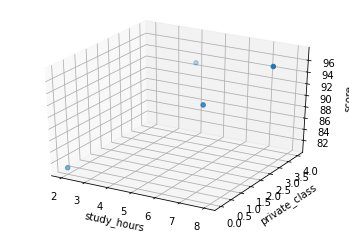

epoch=0, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=100, 기울기1=6.4348, 기울기2=3.9893, 절편=43.9757
epoch=200, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=300, 기울기1=2.5037, 기울기2=2.6323, 절편=70.9656
epoch=400, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=500, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
epoch=600, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=700, 기울기1=1.5415, 기울기2=2.3001, 절편=77.5720
epoch=800, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=900, 기울기1=1.5084, 기울기2=2.2886, 절편=77.7992
epoch=1000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1100, 기울기1=1.5017, 기울기2=2.2863, 절편=77.8453
epoch=1200, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1300, 기울기1=1.5003, 기울기2=2.2858, 절편=77.8547
epoch=1400, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1500, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=1600, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1700, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8570
epoch=1800, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=1900, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=2000, 기울기1=1.5000, 기울기2=2

In [8]:
# 두 개의 기울기에 대해 경사 하강법
# 전체 코드 정리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#공부 시간 x1, 과외 회수 x2, 성적 y 데이터 생성
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
data = np.array(data)
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

# 그래프 확인
ax = plt.axes(projection = '3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.scatter(x1, x2, y)
plt.show()

#기울기 a1, a2, b, lr 초기화
a1 = 0
a2 = 0
b = 0
lr = 0.05

epochs = 2001

#경사 하강법 시작

for i in range(epochs):
  y_pred = a1 * x1 + a2 * x2 + b
  error = y - y_pred
  # 오차 함수 편미분 값
  a1_diff = -(1/len(x1))*sum(x1 * error)
  a2_diff = -(1/len(x2))*sum(x2 * error)
  b_diff = -(1/len(x1))*sum(error)

  a1 = a1 - lr * a1_diff
  a2 = a2 - lr * a2_diff
  b = b - lr*b_diff

  if i % 100 == 0:
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

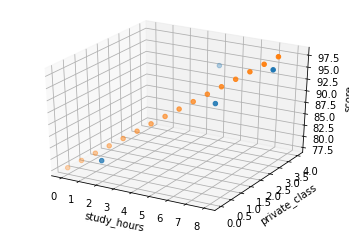

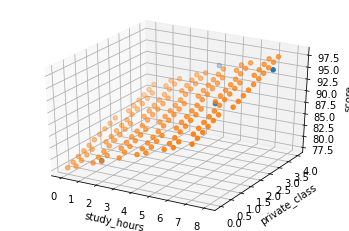

In [33]:
# 예측 평면 시각화 1
ax1 = plt.axes(projection = '3d') # 그래프 유형 정하기
ax1.set_xlabel('study_hours')
ax1.set_ylabel('private_class')
ax1.set_zlabel('score')

x1_range = np.arange(0, 8, 0.5)
x2_range = np.arange(0, 4, 0.25)
y_pred = a1*x1_range + a2*x2_range + b
ax1.scatter(x1, x2, y)
ax1.scatter(x1_range, x2_range, y_pred)
plt.show()

# 예측 평면 시각화 2
ax2 = plt.axes(projection = '3d')
ax2.set_xlabel('study_hours')
ax2.set_ylabel('private_class')
ax2.set_zlabel('score')

x11 = []
for i in range(len(x1_range)):
  for j in range(10):
    x11.append(x1_range[i])

x22 = []
for i in range(10):
  for j in range(len(x2_range)):
    x22.append(x2_range[j])

x11 = np.array([x11])
x22 = np.array([x22])

y_plane = a1*x11 + a2*x22 + b

ax2.scatter(x1, x2, y)
ax2.scatter(x11, x22, y_plane)
plt.show()

위는 다중 선형 회귀를 통해 만든 예측 평면을 시각화 하기 위해 데이터를 순서를 고려하며 직접 추가하여 그린 평면이다.

데이터의 수를 보다 많게 하지 않아 매끄럽지 못한 모습을 보이므로 평면을 그리는 툴을 찾아보았다.

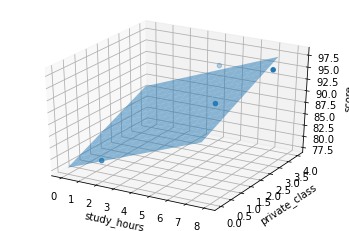

In [37]:
# 추가 코드 정리
# scatter -> plot_surface(xx, yy, z)
# np.meshgrid
ax = plt.axes(projection = '3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')

x1_range = np.arange(0, 8, 0.5)
x2_range = np.arange(0, 4, 0.25)
xx, yy = np.meshgrid(x1_range, x2_range)
z = a1*xx + a2*yy + b
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.scatter(x1, x2, y)

In [47]:
# np.meshgrid
X = np.linspace(1, 5, 5)
Y = np.linspace(6, 10, 5)
XX, YY = np.meshgrid(X, Y)
XX2, YY2 = np.meshgrid(X, Y, indexing='ij')
Z = 15 - XX - YY
print(XX) 
print(YY)
print(Z)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
[[8. 7. 6. 5. 4.]
 [7. 6. 5. 4. 3.]
 [6. 5. 4. 3. 2.]
 [5. 4. 3. 2. 1.]
 [4. 3. 2. 1. 0.]]


In [48]:
XX2

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.]])

In [59]:
# 희소 그리드 sparse grid
# 메모리를 아낄 수 있다.
# sparse=True

X2,Y2 = np.meshgrid(X,Y,sparse=True)

#X2.shape 가 (1, 5)이고 출력 또한 [[1. 2. 3. 4. 5.]]이다.
print(X2.shape)
print(Y2.shape)
print(X2)

(1, 5)
(5, 1)
[[1. 2. 3. 4. 5.]]


In [56]:
Z2 = 15 - X2 - Y2
Z2.shape

(5, 5)

In [57]:
# 그렇지만 Z 를 계산할 때는 동일하게 작동하므로 메모리를 아낄 수 있다.
print(Z2)

array([[8., 7., 6., 5., 4.],
       [7., 6., 5., 4., 3.],
       [6., 5., 4., 3., 2.],
       [5., 4., 3., 2., 1.],
       [4., 3., 2., 1., 0.]])